In [1]:
# Import Libraries
import matplotlib 
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.lines import Line2D


In [4]:
# Read WCS Values in Sexadecimal (x and y) and Degree (xx and yy)

x = np.loadtxt('x_wcs.txt', dtype='string')
xx = np.loadtxt('x_wcs_deg.txt')
print 'x[0]=',x[0]

y = np.loadtxt('y_wcs.txt', dtype='string')
yy = np.loadtxt('y_wcs_deg.txt')
print 'y[0]=',y[0]

x[0]= 01h37m08.528s
y[0]= +15:43:27.91


In [5]:
# Set the Xaxis Ticks value 

# xxx is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is 01h36m30s with step of 10s until 01h37m
xxx = [(1./24.)*360.+(36./(60.*24.))*360.+(30./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(40./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(50./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(00./(3600.*24.))*360.]
# xxxx is the Ticks value in String to inclue the h:m:s
xxxx=['36m30s','36m40s','36m50s','1h37m']
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
# xxxxx is the Array Position of the defined xxx Values in the Data WCS 
xxxxx = np.zeros(4)
for i in range(0,4) : 
    xxxxx[i]=np.where(xx == find_nearest(xx,xxx[i]))[0]

In [6]:
# Set the Yaxis Ticks value 

# yyy is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is +15d44m with step of 2m until +15d54m
yyy = [15+(44./(60)),\
       15+(46./(60)),\
       15+(48./(60)),\
       15+(50./(60)),\
       15+(52./(60)),\
       15+(54./(60))]

# yyyy is the Ticks value in String to inclue the $\degree$ symbol
yyyy=['+15$\degree$44','+15$\degree$46','+15$\degree$48','+15$\degree$50','+15$\degree$52','+15$\degree$54']

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
#yyyyy is the Array Position of the defined yyy Values in the Data WCS 
yyyyy = np.zeros(6)
for i in range(0,6) : 
    yyyyy[i]=np.where(yy == find_nearest(yy,yyy[i]))[0]

In [7]:
# Note for WCS overplot
# from astropy.wcs import WCS
# fits_file = 'NGC628_SN3.merged.tan.fits'
# hdu = fits.open(fits_file)[0]À
# wcs = WCS(hdu.header)
            #Not convenient for the Font modification...

In [8]:
# Read Centroid position of the Ha Peak 
regxy = np.loadtxt('xy_region_centroid_GROW_XY2.txt')
regx = regxy[0:,0] - 1
regy = regxy[0:,1] - 1

IOError: [Errno 2] No such file or directory: 'xy_region_centroid_GROW_XY2.txt'

In [9]:
# Read Fits Data and Data Header
hdu_list1 = fits.open('NGC628_SN1_3727_flux.fits')
hdu_list1.info()

image_data1 = hdu_list1[0].data
hdu_list1.close()

hdu_list2 = fits.open('NGC628_SN2_4861_flux.fits')
hdu_list2.info()

image_data2 = hdu_list2[0].data
hdu_list2.close()

hdu_list3 = fits.open('NGC628_SN2_4959_flux.fits')
hdu_list3.info()

image_data3 = hdu_list3[0].data
hdu_list3.close()

hdu_list4 = fits.open('NGC628_SN2_5007_flux.fits')
hdu_list4.info()

image_data4 = hdu_list4[0].data
hdu_list4.close()


Filename: NGC628_SN1_3727_flux.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_4861_flux.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_4959_flux.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_5007_flux.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


<IPython.core.display.Javascript object>


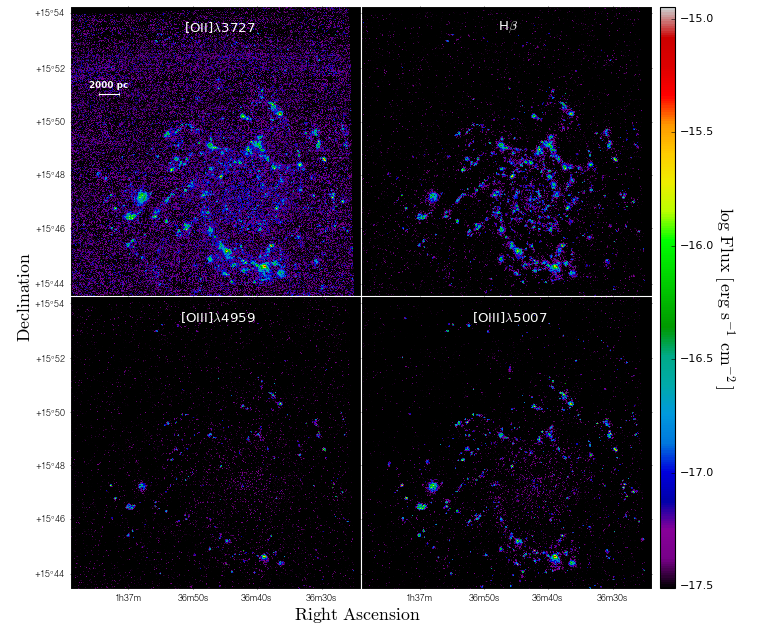

In [10]:
# Plot the Data 
%matplotlib nbagg

# Set the number of subplots
#nb_row = 3
#nb_col = 2
nb_row = 2
nb_col = 2
elem = [[str('') for i_test in range(0,nb_col)]\
                 for j_test in range(0,nb_row)]

# Creation of the frame with subplots
f, axarr = plt.subplots(nb_row, nb_col, figsize=(9.7,7.92))
f.subplots_adjust(hspace=-0.01)
f.subplots_adjust(wspace=0.002)


# Choose X and Y labels

common_x = '$\mathrm{Right\,\,Ascension}$'
common_y = '$\mathrm{Declination}$'
matplotlib.rcParams.update({'font.size': 16.0})
    # and Position
f.text(0.46, 0.02, common_x, ha='center',size=16.0)
f.text(0.02, 0.53, common_y, va='center', rotation='vertical',size=16)

# Plot the Images

a1 = axarr[0][0].imshow(image_data1, cmap='nipy_spectral', clim=(-17.51,-14.95))
a2 = axarr[0][1].imshow(image_data2, cmap='nipy_spectral', clim=(-17.71,-14.95))
a3 = axarr[1][0].imshow(image_data3, cmap='nipy_spectral', clim=(-17.71,-14.95))
a4 = axarr[1][1].imshow(image_data4, cmap='nipy_spectral', clim=(-17.71,-14.95))

# Plot the Color Scale

cbar_ax = f.add_axes([0.85,0.0704,0.02,0.917])
cbar_obj = f.colorbar(a1, cax = cbar_ax)
cbar_obj.set_label('$\mathrm{log\,\,Flux\,\,[\,erg\,\,s^{-1}\,\,cm^{-2}\,]}$', rotation=270, fontsize=16, labelpad=20)
cbar_obj.set_ticks([-17.5,-17,-16.5,-16,-15.5,-15])
cbar_obj.ax.tick_params(labelsize=10)


bob = axarr[0][1].get_yticklabels()
for i in range(0,len(bob)):
    bob[i].set_visible(False)
bob = axarr[1][1].get_yticklabels()
for i in range(0,len(bob)):
    bob[i].set_visible(False)
    
bob = axarr[0][0].get_xticklabels()
for i in range(0,len(bob)):
    bob[i].set_visible(False)
bob = axarr[0][1].get_xticklabels()
for i in range(0,len(bob)):
    bob[i].set_visible(False)

# Define the Data Plot Area

axarr[0][0].set_xlim(0,2048)
axarr[0][0].set_ylim(0,2064)
axarr[0][1].set_xlim(0,2048)
axarr[0][1].set_ylim(0,2064)
axarr[1][0].set_xlim(0,2048)
axarr[1][0].set_ylim(0,2064)
axarr[1][1].set_xlim(0,2048)
axarr[1][1].set_ylim(0,2064)

# Plot the Predefined Ticks

axarr[0][0].set_xticks(xxxxx)
axarr[0][0].set_xticklabels(xxxx, fontsize=8, fontname='Helvetica')
axarr[0][1].set_xticks(xxxxx)
axarr[0][1].set_xticklabels(xxxx, fontsize=8, fontname='Helvetica')
axarr[1][0].set_xticks(xxxxx)
axarr[1][0].set_xticklabels(xxxx, fontsize=8, fontname='Helvetica')
axarr[1][1].set_xticks(xxxxx)
axarr[1][1].set_xticklabels(xxxx, fontsize=8, fontname='Helvetica')

axarr[0][0].set_yticks(yyyyy)
axarr[0][0].set_yticklabels(yyyy, fontsize=8, fontname='Helvetica')
axarr[0][1].set_yticks(yyyyy)
axarr[0][1].set_yticklabels(yyyy, fontsize=8, fontname='Helvetica')
axarr[1][0].set_yticks(yyyyy)
axarr[1][0].set_yticklabels(yyyy, fontsize=8, fontname='Helvetica')
axarr[1][1].set_yticks(yyyyy)
axarr[1][1].set_yticklabels(yyyy, fontsize=8, fontname='Helvetica')

# Define the Scale of that_amount_of_pc Line Position
#that_amount_of_pc = 1000
that_amount_of_pc = 2000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = 2048 * 0.1
xlinemax = 2048 * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = 2064 * 0.7
ylinemax = 2064 * 0.7


# Plot the Scale of that_amount_of_pc Line Position
axarr[0][0].add_line(Line2D([xlinelow, xlinemax], [ylinelow, ylinemax], color='w', linewidth=1, marker='|', markersize=3))
axarr[0][0].annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.02*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 8, fontname = 'Times', color = 'w',fontweight='bold')



# Plot the Ha Peaks Positions 
# plt.plot(regx, regy, '+w', markersize=5)

# Modification of the Plot area and the Axis Labels
f.subplots_adjust(top=0.99)
f.subplots_adjust(bottom=0.069)
f.subplots_adjust(left=0.09)
f.subplots_adjust(right=0.84)

# Add white contour on each images
for i in range(0,2):
    for j in range(0,2):
        for z in ['bottom', 'top', 'left', 'right']:
            axarr[i][j].spines[z].set_color('w')
            axarr[i][j].spines[z].set_linewidth(1)
            
# Add annotation
elem[0][0] = '[OII]$\lambda$3727'
elem[0][1] = 'H'+r'$\beta$'
elem[1][0] = '[OIII]$\lambda$4959'
elem[1][1] = '[OIII]$\lambda$5007'

axarr[0][0].annotate(elem[0][0],xy=(0.64,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='w')
axarr[0][1].annotate(elem[0][1],xy=(0.54,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='w')
axarr[1][0].annotate(elem[1][0],xy=(0.64,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='w')
axarr[1][1].annotate(elem[1][1],xy=(0.64,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='w')


In [11]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_SN2+SN1_flux.eps')
#plt.savefig('NGC628_SN3_flux.png', dpi=1000)